# Uniform matrix product states in the thermodynamic limit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Uniform MPS

In [2]:
from tenpy_toycodes.f_umps import UniformMPS, TransferMatrix
from tenpy_toycodes.a_mps import SimpleMPS

### 1.1) Transfer matrix and canonical form of random injective tensor

* Create a random tensor $A \in \mathbb{C}^{D \times d \times D}$ of physical dimension $d = 2$ and bond dimension $D = 4$.

In [3]:
D, d = 4, 2
A = UniformMPS.get_random_tensor(D, d)

* Show that $A$ is injective, i.e. its transfer matrix fulfills $T_A = \vert R \rangle \langle L \vert + \mathcal{O}(\vert \lambda_2 \vert)$ with $\vert \lambda_2 \vert < 1$ and $R,L > 0$.

In [4]:
# Right eigenvector
T = TransferMatrix([A], [A])
lambdas, Rs = T.get_leading_eigenpairs(k=2)
lambda1, lambda2 = lambdas[0], lambdas[1]
R = Rs[0]
R /= np.trace(R)
ERs, _ = np.linalg.eig(R)

# Left eigenvector
T = TransferMatrix([A], [A], transpose=True)
mus, Ls = T.get_leading_eigenpairs(k=2)
L = Ls[0]
L /= np.trace(L)
ELs, _ = np.linalg.eig(L)

assert np.allclose(np.abs(lambdas), np.abs(mus))
print("lambda_1 = ", lambda1)
print("|lambda_2| = ", np.abs(lambda2))
print("R > 0 with eigenvalues", np.real_if_close(ERs))
print("L > 0 with eigenvalues", np.real_if_close(ELs))

lambda_1 =  (0.9999999999999933-2.220446049250313e-16j)
|lambda_2| =  0.5432252614776077
R > 0 with eigenvalues [0.84751536 0.10282307 0.00975928 0.03990228]
L > 0 with eigenvalues [0.53759349 0.32105351 0.09463921 0.04671379]


* Compute the canonical form of $A$, consisting of left/right orthonormal tensor $A_L / A_R$, center site tensor $A_C$, and center matrix $C$.

In [5]:
AL, AR, AC, C = UniformMPS.to_canonical_form(A)

AL, L: Converged up to tol=1e-10. Final error after 5 iterations: 1.2212914658142701e-11.
AR, R: Converged up to tol=1e-10. Final error after 5 iterations: 3.989297330571256e-12.


* Show that $T_{A_L} = \vert R \rangle \langle \mathbb{1} \vert + \mathcal{O}(\vert \lambda_2 \vert)$ with $\vert \lambda_2 \vert < 1$ and $R > 0$.

In [6]:
# Right eigenvector
T = TransferMatrix([AL], [AL])
lambdas, Rs = T.get_leading_eigenpairs(k=2)
lambda1, lambda2 = lambdas[0], lambdas[1]
R = Rs[0]
R /= np.trace(R)
ERs, _ = np.linalg.eig(R)

# Left eigenvector
T = TransferMatrix([AL], [AL], transpose=True)
mus, Ls = T.get_leading_eigenpairs(k=2)
L = Ls[0]
L /= np.trace(L)

assert np.allclose(np.abs(lambdas), np.abs(mus))
print("lambda_1 = ", lambda1)
print("|lambda_2| = ", np.abs(lambda2))
print("R > 0 with eigenvalues", np.real_if_close(ERs))
print("L = 1:", np.allclose(L, np.eye(4)/4))

lambda_1 =  (0.9999999999999958-1.1102230246251565e-16j)
|lambda_2| =  0.5432252614819171
R > 0 with eigenvalues [0.8893767  0.0969476  0.01106976 0.00260595]
L = 1: True


* Show that $T_{A_R} = \vert \mathbb{1} \rangle \langle L \vert + \mathcal{O}(\vert \lambda_2 \vert)$ with $\vert \lambda_2 \vert < 1$ and $L > 0$.

In [7]:
# Right eigenvector
T = TransferMatrix([AR], [AR])
lambdas, Rs = T.get_leading_eigenpairs(k=2)
lambda1, lambda2 = lambdas[0], lambdas[1]
R = Rs[0]
R /= np.trace(R)

# Left eigenvector
T = TransferMatrix([AR], [AR], transpose=True)
lambdas, Ls = T.get_leading_eigenpairs(k=2)
lambda1, lambda2 = lambdas[0], lambdas[1]
L = Ls[0]
L /= np.trace(L)
ELs, _ = np.linalg.eig(L)

assert np.allclose(np.abs(lambdas), np.abs(mus))
print("lambda_1 = ", lambda1)
print("|lambda_2| = ", np.abs(lambda2))
print("R = 1:", np.allclose(R, np.eye(4)/4))
print("L > 0 with eigenvalues", np.real_if_close(ELs))

lambda_1 =  (0.9999999999999996+5.551115123125783e-17j)
|lambda_2| =  0.5432252614727009
R = 1: True
L > 0 with eigenvalues [0.8893767  0.0969476  0.01106976 0.00260595]


* Directly create a random uMPS (for different tolerances) and test its canonical form.

In [8]:
psi_random = UniformMPS.from_desired_bond_dimension(D=100, d=3, tol=1.e-10)
print(psi_random.test_canonical_form())
psi_random = UniformMPS.from_desired_bond_dimension(D=100, d=3, tol=1.e-5)
print(psi_random.test_canonical_form())

AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 2.179117334095899e-11.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 1.3241467748230306e-14.
[2.68597533e-14 2.88376207e-14 0.00000000e+00 1.38393109e-14]
AL, L: Converged up to tol=1e-05. Final error after 5 iterations: 4.58792806411049e-06.
AR, R: Converged up to tol=1e-05. Final error after 5 iterations: 1.4480698442663406e-07.
[2.82684946e-14 3.10546909e-14 0.00000000e+00 1.44806984e-07]


### 1.2) AKLT state

For the spin-1 matrices $S_x$, $S_y$ and $S_z$, we consider the two-site Hamiltonian matrix <br>
 $$h = S_x \otimes S_x + S_y \otimes S_y + S_z \otimes S_z + \frac{1}{3}(S_x \otimes S_x + S_y \otimes S_y + S_z \otimes S_z)^2 = 2P_{S=2}-2/3.$$
* Implement $h, h^2 \in \mathbb{C}^{3 \times 3 \times 3 \times 3}$.

In [9]:
d = 3

# Spin-1 matrices
Sx = np.array([[0., 1., 0.],[1., 0., 1.],[0., 1., 0.]]) / np.sqrt(2)
Sy = -1.j * np.array([[0., 1., 0.],[-1., 0., 1.],[0., -1., 0.]]) / np.sqrt(2) 
Sz = np.array([[1., 0., 0.],[0., 0., 0.],[0., 0., -1.]])

# Hamiltonian
S_dot_S = np.kron(Sx, Sx) + np.kron(Sy, Sy) + np.kron(Sz, Sz)
h = S_dot_S + (1/3.) * S_dot_S @ S_dot_S
h2 = h @ h
h = np.reshape(h, (d, d, d, d))
h2 = np.reshape(h2, (d, d, d, d))

* Initialize the ground state uMPS $\vert \psi_{\mathrm{AKLT}} \rangle = \vert \psi(A) \rangle$ with $A_L^{+1} = \sqrt{\frac{2}{3}}\sigma^{+}$, $A_L^{0} = \sqrt{\frac{1}{3}}\sigma^{z}$, $A_L^{-1} = -\sqrt{\frac{2}{3}}\sigma^{-}$. 

In [10]:
D = 2

AL = np.zeros((D, d, D), dtype=complex)
AL[:, 0, :] = np.sqrt(2/3.) * np.array([[0., 0.],[1., 0.]])
AL[:, 1, :] = np.sqrt(1/3.) * np.array([[1., 0.],[0., -1.]])
AL[:, 2, :] = -np.sqrt(2/3.) * np.array([[0., 1.],[0., 0.]])

AR, C = UniformMPS.right_orthonormalize(AL)
AC = np.tensordot(AL, C, axes=(2, 0))  # vL p [vR], [vL] vR
psi_AKLT = UniformMPS(AL, AR, AC, C)

AR, R: Converged up to tol=1e-10. Final error after 5 iterations: 8.220141685495724e-17.


Show the following properties of $\vert \psi_{\mathrm{AKLT}} \rangle$: 
* Ground state energy $e = \langle h \rangle = -2/3$, 
* Variance $\langle h^2 \rangle - \langle h \rangle^2 = 0$ (frustration free),
* Entanglement entropy $S = \ln(2) \approx 0.6931471805599453$,
* Correlation length $\xi = -1/\ln(\vert \lambda_2 \vert) = -1/\ln(1/3) = 1/\ln 3 \approx 0.9102392266268371$,
* Connected correlation function $C(n) = \langle S_z^0 S_z^n \rangle - \langle S_z \rangle^2 \rightarrow \vert \lambda_2 \vert^{n-1}$ (plot).

In [11]:
# Ground state energy
print("e = ", psi_AKLT.get_bond_expectation_value(h))
# Variance
print("var_e = ", psi_AKLT.get_bond_expectation_value(h2) - psi_AKLT.get_bond_expectation_value(h)**2)
# Entanglement entropy
print("S = ", psi_AKLT.get_entanglement_entropy())
# Correlation length
print("xi = ", psi_AKLT.get_correlation_length())
# Second largest eigenvalue (to check consistency with formula above)
T = TransferMatrix([psi_AKLT.AL], [psi_AKLT.AL])
lambdas, _ = T.get_leading_eigenpairs(k=2)
lambda2 = lambdas[1]
print("|lambda2| = ", np.abs(lambda2))

e =  -0.6666666666666667
var_e =  -1.1102230246251565e-16
S =  0.6931471805599452
xi =  0.9102392266268376
|lambda2| =  0.33333333333333354


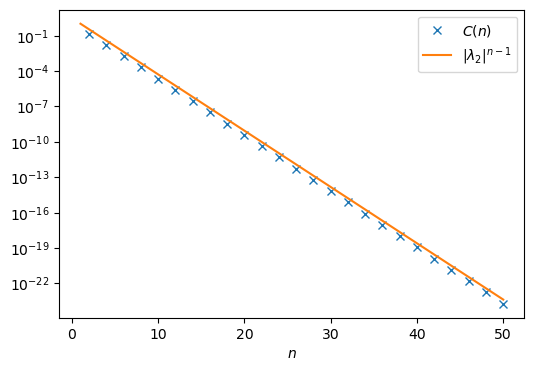

In [12]:
# Correlation functions
N = 50
ns = np.arange(1, N+1)
Cs = psi_AKLT.get_correlation_functions(Sz, Sz, N)
Cs_connected = Cs - psi_AKLT.get_site_expectation_value(Sz)**2
Cs_theo = []
for n in ns:
    Cs_theo.append(np.abs(lambda2)**(n-1))

plt.figure(figsize=(6, 4))
plt.xlabel(r"$n$")
plt.semilogy(ns, Cs_connected, "x", label=r"$C(n)$")
plt.semilogy(ns, Cs_theo, "-", label=r"$\vert \lambda_2 \vert^{n-1}$")
plt.legend(loc="best")
plt.show()

### 1.3) Conversions between uniform MPS and infinite MPS

* Convert the uMPS $\vert \psi_{\mathrm{AKLT}} \rangle$ to an iMPS and recheck the values of $e$, $S$, $\xi$.

In [13]:
psi_AKLT_infinite = psi_AKLT.to_infinite_MPS(L=1)

# Ground state energy
print("e = ", psi_AKLT_infinite.bond_expectation_value([h]))
# Variance
print("var_e = ", psi_AKLT_infinite.bond_expectation_value([h2]) \
      - psi_AKLT_infinite.bond_expectation_value([h])**2)
# Entanglement entropy
print("S = ", psi_AKLT_infinite.entanglement_entropy())
# Correlation length
print("xi = ", psi_AKLT_infinite.correlation_length())

e =  [-0.66666667]
var_e =  [-2.22044605e-16]
S =  [0.69314718]
xi =  0.9102392266268373


* Denote by $B \in \mathbb{C}^{2 \times 3 \times 2}$ the right canonical tensor of $\vert \psi_{\mathrm{AKLT}} \rangle$ and by $U \in \mathbb{C}^{2 \times 2}$ a random unitary. Show that the iMPS $\vert\psi(B_1, B_2)\rangle$ with $B_1 = BU$ and $B_2 = U^*B$ is translation invariant and can be converted to a uMPS. Check that this is still the AKLT state.

In [14]:
B = psi_AKLT_infinite.Bs[0]
C = psi_AKLT_infinite.Ss[0]
from scipy.stats import unitary_group
U = unitary_group.rvs(2)
B1 = np.tensordot(B, U, axes=(2, 0))
B2 = np.tensordot(np.conj(U).T, B, axes=(1, 0))

psi_infinite = SimpleMPS([B1, B2], [C, C], bc="infinite")
psi_uniform = UniformMPS.from_infinite_MPS(psi_infinite)

# Ground state energy
print("e = ", psi_uniform.get_bond_expectation_value(h))
# Variance
print("var_e = ", psi_uniform.get_bond_expectation_value(h2) - psi_uniform.get_bond_expectation_value(h)**2)
# Entanglement entropy
print("S = ", psi_uniform.get_entanglement_entropy())
# Correlation length
print("xi = ", psi_uniform.get_correlation_length())

Infinite MPS is translation invariant -> Conversion to uniform MPS.
AL, L: Converged up to tol=1e-10. Final error after 4 iterations: 2.3515530018395587e-16.
AR, R: Converged up to tol=1e-10. Final error after 4 iterations: 1.8553129877040763e-16.
e =  -0.6666666666666674
var_e =  -6.106226635438361e-16
S =  0.6931471805599452
xi =  0.9102392266268379


* For random right canonical tensors $B_1 \in \mathbb{C}^{D \times d \times D}$ and $B_2 \in \mathbb{C}^{D \times d \times D}$, show that the iMPS $\vert\psi(B_1, B_2)\rangle$ is in general not translation invariant and cannot be converted to a uMPS.

In [15]:
tensor1 = UniformMPS.get_random_tensor(D=100, d=3)
tensor2 = UniformMPS.get_random_tensor(D=100, d=3)
_, B1, _, S1 = UniformMPS.to_canonical_form(tensor1)
_, B2, _, S2 = UniformMPS.to_canonical_form(tensor2)
S1, S2 = np.diag(S1), np.diag(S1)

psi_infinite = SimpleMPS([B1, B2], [S1, S2], bc="infinite")
psi_uniform = UniformMPS.from_infinite_MPS(psi_infinite)

AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 8.413793772777834e-12.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 9.688902271822502e-15.
AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 3.942489425753234e-12.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 1.1488393747852049e-14.


ValueError: Infinite MPS is not translation invariant.

## 2) VUMPS: Variational ground state search

In [16]:
from tenpy_toycodes.b_model import TFIModel
from tenpy_toycodes.tfi_exact import infinite_gs_energy

from tenpy_toycodes.f_umps import UniformMPS
from tenpy_toycodes.g_vumps import vumps_algorithm

* For the transverse field Ising model in the thermodynamic limit, find the ground state using the VUMPS algorithm. Investigate the convergence of the ground state energy density $e_0$ with the bond dimension $D$. Consider both the paramagnetic and ferromagnetic quantum phase.

In [17]:
# paramagnetic phase
g = 1.5

e0_exact = infinite_gs_energy(J=1., g=g)
print(f"e0_exact = {e0_exact}.")

h = TFIModel(L=1, J=1., g=g, bc='infinite').H_bonds[0]
Ds = [2, 4, 6, 8, 10, 20, 30, 40, 50]
for D in Ds:
    print(f"D = {D}:")
    guess_psi0 = UniformMPS.from_desired_bond_dimension(D)
    e0, psi0, var0 = vumps_algorithm(h, guess_psi0, tol=1.e-10)
    print(f"Error |e0 - e0_exact| = {np.abs(e0 - e0_exact)}.")

e0_exact = -1.6719262215361952.
D = 2:
AL, L: Converged up to tol=1e-10. Final error after 4 iterations: 2.2730721416562006e-12.
AR, R: Converged up to tol=1e-10. Final error after 5 iterations: 2.5438405243138006e-16.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 21 iterations: 7.437518184864486e-11.
Ground state energy density: -1.6717366238936096. 
Ground state variance density: (0.000988426116763065-5.0230209941540665e-17j).
Error |e0 - e0_exact| = 0.00018959764258563716.
D = 4:
AL, L: Converged up to tol=1e-10. Final error after 5 iterations: 2.0024470602650553e-11.
AR, R: Converged up to tol=1e-10. Final error after 5 iterations: 6.0343447628791e-16.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 14 iterations: 2.4653777380885917e-11.
Ground state energy density: -1.6719259668748492. 
Ground state variance density: (1.3262842025671406e-06-1.2191853429599497e-16j).
Error |e0 - e0_exact| = 2.5466134601082047e-07.
D = 6:
AL, L

In [18]:
# ferromagnetic phase 
g = 0.5

e0_exact = infinite_gs_energy(J=1., g=g)
print(f"e0_exact = {e0_exact}.")

h = TFIModel(L=1, J=1., g=g, bc='infinite').H_bonds[0]
Ds = [2, 4, 6, 8, 10, 20, 30, 40, 50]
for D in Ds:
    print(f"D = {D}:")
    guess_psi0 = UniformMPS.from_desired_bond_dimension(D)
    e0, psi0, var0 = vumps_algorithm(h, guess_psi0, tol=1.e-10)
    print(f"Error |e0 - e0_exact| = {np.abs(e0 - e0_exact)}.")

e0_exact = -1.0635444099733717.
D = 2:
AL, L: Converged up to tol=1e-10. Final error after 5 iterations: 5.117875266520903e-16.
AR, R: Converged up to tol=1e-10. Final error after 4 iterations: 1.415262216750919e-16.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 10 iterations: 8.68023033706559e-11.
Ground state energy density: -1.0635440740663131. 
Ground state variance density: (1.2520078560755796e-06-1.623592753297043e-17j).
Error |e0 - e0_exact| = 3.3590705861286096e-07.
D = 4:
AL, L: Converged up to tol=1e-10. Final error after 5 iterations: 1.5849923691414327e-13.
AR, R: Converged up to tol=1e-10. Final error after 5 iterations: 3.5928568972189666e-16.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 23 iterations: 7.737104957415431e-11.
Ground state energy density: -1.0635444098648636. 
Ground state variance density: (4.044021161778849e-10-1.3791390447194518e-16j).
Error |e0 - e0_exact| = 1.0850809140094952e-10.
D = 6:
AL, L:

* For a bond dimension $D = 30$, plot the magnetization $m = \vert \langle \sigma^z \rangle \vert$ against the transverse field $g$ to locate the quantum phase transition.

In [19]:
D = 30
gs = [0., 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.994, 0.998,\
       1.002, 1.006, 1.01, 1.02, 1.03, 1.04, 1.05, 1.1, 1.2, 1.4, 1.6, 1.8, 2.0]
szs = []
for g in gs:
    print(f"g = {g}:")
    tfi_model = TFIModel(L=1, J=1., g=g, bc='infinite')
    h = tfi_model.H_bonds[0]
    guess_psi0 = UniformMPS.from_desired_bond_dimension(D)
    _, psi0, _ = vumps_algorithm(h, guess_psi0, tol=1.e-8)
    sz = psi0.get_site_expectation_value(tfi_model.sigmaz)
    print(f"Magnetization density in z-direction:{sz}.")
    szs.append(sz)

g = 0.0:
AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 6.101172401370538e-12.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 1.2068799078755968e-15.
Ground state converged up to tol=1e-08 in gradient norm. Final error after 3 iterations: 5.534426945519992e-11.
Ground state energy density: -1.0000000000000009. 
Ground state variance density: (7.070119693960579e-29-3.0174216397341688e-30j).
Magnetization density in z-direction:-1.0000000000000024.
g = 0.2:
AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 8.513256892363685e-11.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 3.255072730504732e-14.
Ground state converged up to tol=1e-08 in gradient norm. Final error after 3 iterations: 4.82227572988563e-11.
Ground state energy density: -1.0100252539845738. 
Ground state variance density: (-3.2779971770834082e-15+2.2060973111238252e-18j).
Magnetization density in z-direction:0.9949102475942001.
g = 0.4:
AL, L: Converg

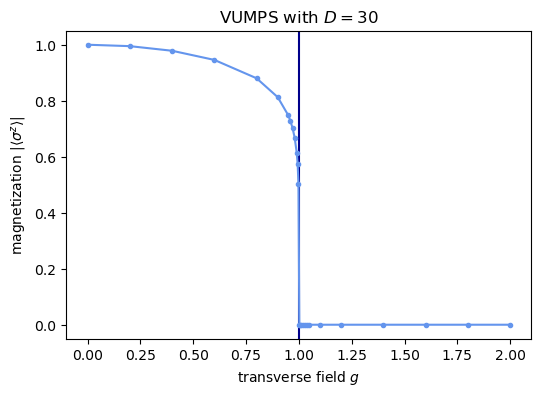

In [20]:
plt.figure(figsize=(6, 4))
plt.title(f"VUMPS with $D={D}$")
plt.axvline(x=1.0, color="darkblue")
plt.plot(gs, np.abs(szs), ".-", color="cornflowerblue")
plt.xlabel(r"transverse field $g$")
plt.ylabel(r"magnetization $\vert \langle \sigma^z \rangle \vert$")
plt.show()

Magnetization $m =  \vert \langle \sigma^z \rangle \vert$ as order parameter: <br>
$m >0$ for $g<1$ (ferromagnetic phase), $m = 0$ for $g>1$ (paramagnetic phase), quantum phase transition at $g=1$.